<a href="https://colab.research.google.com/github/kyoto-kaira/fake-face-image-detection/blob/main/fake_face_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kyoto-kaira/fake-face-image-detection.git
!pip install -q timm
%cd /content/fake-face-image-detection

Cloning into 'fake-face-image-detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 11 (delta 0), reused 3 (delta 0), pack-reused 8
Receiving objects: 100% (11/11), 73.11 MiB | 32.83 MiB/s, done.
/content/fake-face-image-detection


In [ ]:
import timm
import cv2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

class Classifier(nn.Module):
    def __init__(self, name, *, pretrained=False, in_chans=3):
        super().__init__()
        model = timm.create_model(name, pretrained=pretrained, in_chans=in_chans)
        clsf = model.default_cfg['classifier']
        n_features = model._modules[clsf].in_features
        model._modules[clsf] = nn.Identity()

        self.fc = nn.Linear(n_features, 1)
        self.model = model

    def forward(self, x):
        x = self.model(x)
        logits = self.fc(x)
        return logits

def inference(img_path, model):
    model.eval()
    img_origin = cv2.imread(img_path)
    img = cv2.resize(img_origin, (256, 256), interpolation =cv2.INTER_LINEAR) / 255
    img = torch.tensor(img, dtype=torch.float32).to(device).reshape([-1, 3, 256, 256])
    pred = model(img).squeeze().sigmoid().detach().cpu().numpy()
    plt.imshow(cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB))
    plt.title(f'Fake : {pred*100:.1f}%')
    plt.axis('off')
    plt.show()

device: cpu


In [ ]:
model = Classifier('tf_efficientnetv2_s', pretrained=False)
model.to(device)
model.load_state_dict(torch.load('./efficientnetv2_s.pth', map_location=device)['model'])

<All keys matched successfully>

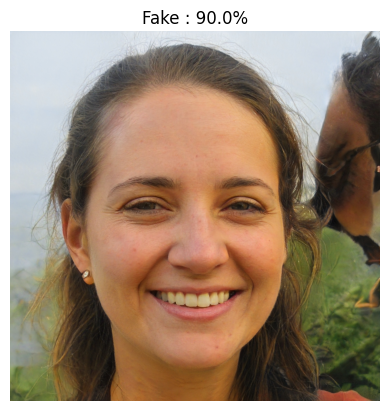

In [ ]:
path = './samples/avatar-1122482d4efbd3f44e4c99e93b36d42d.jpg'
inference(path, model)

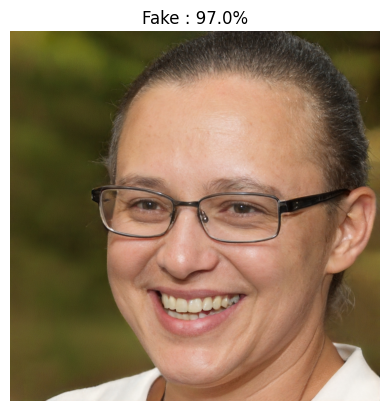

In [ ]:
path = './samples/avatar-1137ad391410c99cd973a54ca6360653.jpg'
inference(path, model)

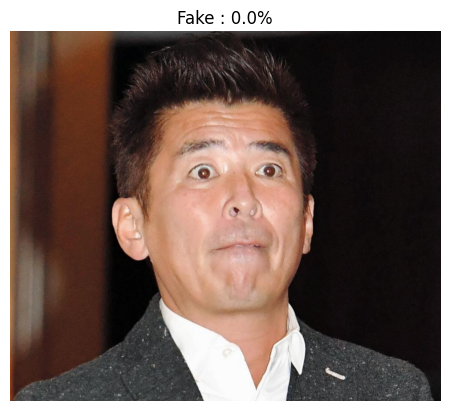

In [ ]:
path = './samples/katsumata.jpg'
inference(path, model)